# 📊 Анализ матчей Английской Премьер-лиги (EPL)

Проект посвящён анализу футбольных матчей Английской Премьер-лиги.
Исследуются голы, поведение команд, карточки, турнирная таблица и другие метрики.

**Инструменты:** Python, pandas, seaborn, matplotlib.
**Датасет:** CSV-файл с матчами EPL.

## 🧩 Задачи:
1. Какая команда в среднем забивает и пропускает больше всего голов?
2. Сколько голов в среднем забивают в первом и втором таймах?
3. Как часто команда, выигравшая первый тайм, побеждает матч?
4. Зависимость: жёлтые карточки (X) vs. красные карточки (Y)
5. Турнирная таблица сезона 2023/24 (11.08.23–19.05.24)
6. (Дополнительно) Кто чаще побеждал, будучи аутсайдером?


In [71]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv(r'C:\Users\HP\Downloads\677eafb22ba621.83776212epl-training-1.csv')

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv(r'C:\Users\HP\Downloads\677eafb22ba621.83776212epl-training-1.csv')

In [2]:
#1 задача
#считаем количество забитых мячей в качестве хозяев и гостей 
df_sco_sorted_home = df.groupby("HomeTeam", as_index=False)['FTHG'].sum()
df_sco_sorted_away = df.groupby("AwayTeam", as_index=False)[['FTAG']].sum()
total_sco_goals = pd.merge(df_sco_sorted_home, df_sco_sorted_away, left_on = 'HomeTeam', right_on = 'AwayTeam', how='outer')
total_sco_goals['total_sco_sum'] = total_sco_goals['FTHG'] + total_sco_goals['FTAG']
#считаем количество пропущенных мячей в качестве хозяев и гостей
df_con_sorted_home = df.groupby("HomeTeam", as_index=False)['FTAG'].sum()
df_con_sorted_away = df.groupby("AwayTeam", as_index=False)['FTHG'].sum() 
total_con_goals = pd.merge(df_con_sorted_home, df_con_sorted_away, left_on = 'HomeTeam', right_on = 'AwayTeam', how = 'outer')
total_con_goals['total_con_sum'] = total_con_goals['FTAG'] + total_con_goals['FTHG']
#считаем количесво матчей у каждой команды в качестве гостей и хозяев
home_matches = df['HomeTeam'].value_counts().reset_index()
home_matches.columns = ['Team', 'MatchesHome']
away_matches = df['AwayTeam'].value_counts().reset_index()
away_matches.columns = ['Team', 'MatchesAway']
total_matches = pd.merge(home_matches, away_matches, on='Team', how='outer')
total_matches['Matches_total'] = total_matches['MatchesHome'] + total_matches['MatchesAway']
#объединяем забитые и пропущенные голы,а также количество проведенных матчей 
final_stats = pd.merge(total_sco_goals, total_con_goals, on='HomeTeam', how='outer')
final_stats = pd.merge(final_stats, total_matches,left_on='HomeTeam',right_on='Team', how='outer')
#среднее значение забитых мячей и пропущенных
final_stats['average_sco_goals'] = final_stats['total_sco_sum'] / final_stats['Matches_total']
final_stats['average_sco_goals'] =final_stats['average_sco_goals'].round(3)
final_stats['average_con_goals'] = final_stats['total_con_sum'] / final_stats['Matches_total']
final_stats['average_con_goals'] =final_stats['average_con_goals'].round(3)
#определение лучший и худший команды
sorted1_df = final_stats.sort_values(by='average_sco_goals', ascending=False)
sorted2_df = final_stats.sort_values(by='average_con_goals', ascending=False)
sorted1_df = sorted1_df.reset_index()
sorted2_df = sorted2_df.reset_index()
the_best_team = sorted1_df.loc[0, 'HomeTeam']
the_worst_team =sorted2_df.loc[0, 'HomeTeam']
print('Команда с наибольшим количеством забитых мячей:',the_best_team,)
print('Команда с наибольшем количеством пропущенных мячей:',the_worst_team)

Команда с наибольшим количеством забитых мячей: Arsenal
Команда с наибольшем количеством пропущенных мячей: Luton


In [3]:
#2 задача 
df['total_first_half_time'] = df['HTHG'] + df['HTAG']	
df['total_full_time'] = df['FTHG'] + df['FTAG']	
df['total_second_half_time'] = df['total_full_time'] - df['total_first_half_time']
mean_goals_first = df['total_first_half_time'].mean()
mean_goals_second = df['total_second_half_time'].mean()
print('Среднее количество забитых мячей в первом тайме',mean_goals_first)
print('Среднее количество забитых мячей во втором тайме',mean_goals_second)

Среднее количество забитых мячей в первом тайме 1.2022776572668112
Среднее количество забитых мячей во втором тайме 1.5106290672451193


In [4]:
#3 задача
team_win_home = len(df.query('HTR =="H" & FTR == "H"'))
team_win_away = len(df.query('HTR =="A" & FTR == "A"'))
team_win = team_win_home + team_win_away
team = len(df.query('HTR =="H" | HTR == "A"'))
print('Процент команд, побидивших в матче, введя в первом тайме:',round(team_win / team *100, 2),"%")

Процент команд, побидивших в матче, введя в первом тайме: 76.24 %


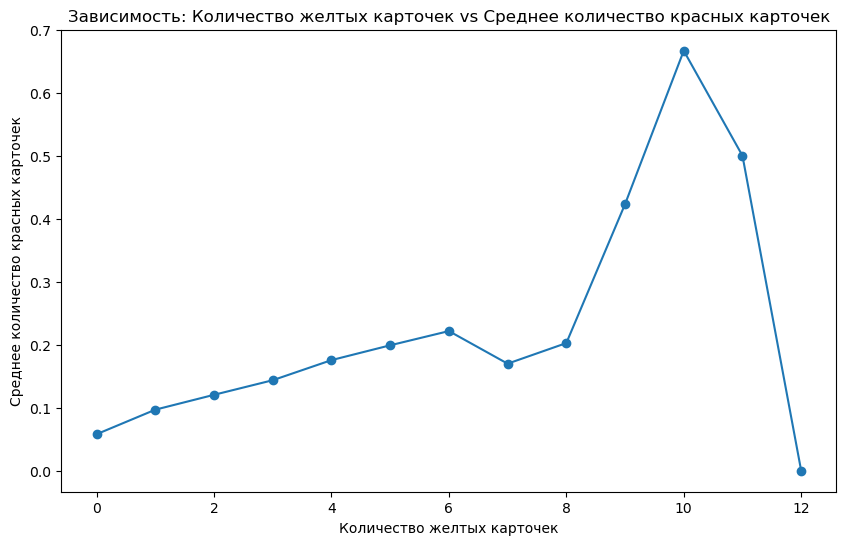

In [5]:
#4 задача
df['total_yellow_cards'] = df['HY'] + df['AY']
df['total_red_cards'] = df['HR'] + df['AR']
average_red_cards = df.groupby('total_yellow_cards')['total_red_cards'].mean().reset_index()
average_red_cards.columns = ['YellowCards', 'AverageRedCards']
plt.figure(figsize=(10, 6))
plt.plot(average_red_cards['YellowCards'], average_red_cards['AverageRedCards'], marker='o')
plt.title('Зависимость: Количество желтых карточек vs Среднее количество красных карточек')
plt.xlabel('Количество желтых карточек')
plt.ylabel('Среднее количество красных карточек')
plt.show()

In [46]:
#5 задача
#поиск индекса когда начинается сезон
index_first = df.query('Date == "11/08/2023"').index[0]
#срез таблицы сезона 23/24
new1_df = df.iloc[index_first:].reset_index(drop=True)
new_df = new1_df.drop_duplicates(subset=['Date','HomeTeam'])
#считаем кол-во матчей как в гостях так и дома 
home_matches = new_df['HomeTeam'].value_counts().reset_index()
home_matches.columns = ['Team', 'MatchesHome']
away_matches = new_df['AwayTeam'].value_counts().reset_index()
away_matches.columns = ['Team', 'MatchesAway']
table = pd.merge(home_matches, away_matches, left_on='Team', right_on='Team', how='outer').fillna(0)
table['Matches'] = table['MatchesHome'] + table['MatchesAway']
table.drop(columns = ['MatchesHome','MatchesAway'])
#считаем количество побед поражений и ничьих
wins_home = new_df[new_df['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='Wins_home')
draws_home = new_df[new_df['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='Draws_home')
draws_away = new_df[new_df['FTR'] == 'D'].groupby('AwayTeam').size().reset_index(name='Draws_away')
loses_home = new_df[new_df['FTR'] == 'A'].groupby('HomeTeam').size().reset_index(name='Loses_home')
loses_away = new_df[new_df['FTR'] == 'H'].groupby('AwayTeam').size().reset_index(name='Loses_away')
wins_away = new_df[new_df['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='Wins_away')
#объединяем все таблицы
table_team = pd.merge(wins_home, draws_home, left_on='HomeTeam', right_on='HomeTeam', how='outer').fillna(0)
table_team = pd.merge(table_team, draws_away, left_on='HomeTeam', right_on='AwayTeam', how='outer').fillna(0)
table_team = pd.merge(table_team, loses_home, left_on='HomeTeam', right_on='HomeTeam', how='outer').fillna(0)
table_team = pd.merge(table_team, loses_away, left_on='HomeTeam', right_on='AwayTeam', how='outer').fillna(0)
table_team = pd.merge(table_team, wins_away, left_on='HomeTeam', right_on='AwayTeam', how='outer').fillna(0)
#объединяем домашние и гостевые результаты
table_team['Draws'] = table_team['Draws_home'] + table_team['Draws_away']
table_team['Wins'] = table_team['Wins_home'] + table_team['Wins_away']
table_team['Loses'] = table_team['Loses_home'] + table_team['Loses_away']
table_team['Points'] = table_team['Wins'] *3 + table_team['Loses'] * 0 + table_team['Draws'] * 1
table_team['Games'] = table_team['Wins'] + table_team['Loses'] + table_team['Draws']
table_team = table_team.sort_values(by = 'Points',ascending  = False).reset_index(drop = True)
table_team.index = range(1, len(table_team) + 1)
table_team = table_team[['HomeTeam', 'Wins', 'Draws','Loses','Points','Games']]
table_team['Draws'] = table_team['Draws'].astype(int) 
table_team['Loses'] = table_team['Loses'].astype(int) 
table_team['Points'] = table_team['Points'].astype(int)  
table_team['Games'] = table_team['Games'].astype(int) 
print(table_team)

            HomeTeam  Wins  Draws  Loses  Points  Games
1           Man City    28      7      3      91     38
2            Arsenal    28      5      5      89     38
3          Liverpool    24     10      4      82     38
4        Aston Villa    20      8     10      68     38
5          Tottenham    20      6     12      66     38
6            Chelsea    18      9     11      63     38
7         Man United    18      6     14      60     38
8          Newcastle    18      6     14      60     38
9           West Ham    14     10     14      52     38
10    Crystal Palace    13     10     15      49     38
11           Everton    13      9     16      48     38
12          Brighton    12     12     14      48     38
13       Bournemouth    13      9     16      48     38
14            Fulham    13      8     17      47     38
15            Wolves    13      7     18      46     38
16         Brentford    10      9     19      39     38
17     Nott'm Forest     9      9     20      36

In [198]:
df['Date'] = pd.to_datetime(df['Date'])

# Функция для определения сезона
def get_season(date):
    year = date.year
    if date.month >= 8:
        return year
    else: 
        return year - 1

# Добавляем колонку с сезоном
df['Season'] = df['Date'].apply(get_season)

def count(df):
    outsider_count = 0
    wins_team = {}
    outsider_wins = {}
    current_season = 0 

    for index in range(len(df)):
        home_team = df.loc[index, 'HomeTeam']
        away_team = df.loc[index, 'AwayTeam']
        result = df.loc[index, 'FTR']
        season = df.loc[index, 'Season']
        if current_season == 0:
            current_season = season
        elif current_season != season:
            wins_team = {}
            current_season = season
        # заполнение словаря командами
        if home_team not in wins_team:
            wins_team[home_team] = 0
        if away_team not in wins_team:
            wins_team[away_team] = 0
        if home_team not in outsider_wins:
            outsider_wins[home_team] = 0
        if away_team not in outsider_wins:
            outsider_wins[away_team] = 0
        # Подсчет побед для каждой команды
        if result == 'H':
            wins_team[home_team] += 1 
        elif result == 'A':
            wins_team[away_team] += 1
        # Словарь подсчетов побед для каждой команды
        if (result == 'H') and (wins_team[home_team] < wins_team[away_team]):
            outsider_wins[home_team] += 1  
        elif (result == 'A') and (wins_team[away_team] < wins_team[home_team]):
            outsider_wins[away_team] += 1  
    return outsider_wins
outsider_wins = count(df)
max_wins_team = max(outsider_wins, key=outsider_wins.get)
max_wins_count = outsider_wins[max_wins_team]
print(f"Команда с наибольшим количеством побед в статусе аутсайдера: {max_wins_team} {max_wins_count} победы")

Команда с наибольшим количеством побед в статусе аутсайдера: Newcastle 74 победы
